# Project Proposal: Statistical Analysis of Van 311 Service Requests

**Aminu Yiwere**  
_IE6200 - Statistics and Probability_

## Introduction

The dataset selected for this project is the **Van 311 Service Requests dataset**, which contains 598,855 records of service requests made to Vancouver’s 311 system from 2022 to 2024. This dataset includes variables such as:

- The department handling the request
- Service request type
- Status
- Closure reason
- Submission channel
- Geographic information (latitude, longitude, and local area)
- Timestamps for when requests were opened and closed

This dataset provides a wealth of information for analyzing trends, measuring performance, and identifying disparities in response times and service quality across departments and neighborhoods. However, it also presents challenges such as missing values in fields like geographic information and local areas, which will require cleaning and preprocessing.

---

## Research Questions

This project aims to answer the following key research questions:

1. **What are the most common service request types, and how do they vary across departments?**
2. **What is the average response time for service requests, and does it differ significantly between:**
   - Departments (e.g., Engineering Management vs. Vancouver Police Department)?
   - Submission channels (e.g., Phone vs. WEB)?
3. **Are there seasonal or temporal patterns in service requests?**
4. **Do certain local areas have disproportionately higher complaint volumes or response times?**
5. **Is there a significant difference in response times among multiple service request types?** (ANOVA)

These questions will be addressed using confidence intervals, hypothesis testing, and ANOVA, with assumptions validated for statistical accuracy.

---

## Preliminary EDA Plan

The Exploratory Data Analysis (EDA) will focus on:

1. **Descriptive Statistics**:
   - Summarize service request types, statuses, and closure reasons.
   - Compute basic statistics (mean, median, standard deviation) for response times.
2. **Visualizations**:

   - Bar charts for the distribution of service request types and submission channels.
   - Boxplots to compare response times across departments and request types.
   - Time-series plots to examine seasonal patterns.

3. **Data Cleaning**:
   - Convert timestamps to datetime format and calculate response times (difference between ‘Service request close date’ and ‘Service request open timestamp’).
   - Handle missing values by filtering or imputing where necessary.

The results of the EDA will guide the selection of statistical tests to ensure robust analysis.


In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
# from statsmodels.stats.weightstats import ztest


In [188]:
# Read service request file
data = pd.read_csv('/Users/ay/Desktop/StatsProject/data/3-1-1-service-requests.csv', delimiter=';')
data.head()

,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Last modified timestamp,Address,Local area,Channel,Latitude,Longitude,geom
0,ENG - Parking Management,Residential Parking Permit Request Case,Close,Unknown,2022-09-16T20:21:59-07:00,2023-10-19,2023-10-19T09:31:57-07:00,NaN,Sunset,Phone,NaN,NaN,NaN
1,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16T20:31:00-07:00,2022-09-21,2022-09-21T09:05:01-07:00,14 W 14TH AV,Mount Pleasant,Phone,49.258205,-123.105516,"49.25820514218, -123.10551579402"
2,ENG - Sanitation Services,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16T20:36:00-07:00,2022-09-22,2022-09-22T12:07:23-07:00,3180 KINGS AV,Renfrew-Collingwood,Phone,49.241261,-123.037927,"49.24126129747, -123.03792693417"
3,ENG - Parking Enforcement and Operations,Parking Enforcement Transfer Case,Close,Unknown,2022-09-16T20:37:36-07:00,2022-09-16,2022-09-16T20:37:36-07:00,NaN,NaN,Phone,NaN,NaN,NaN
4,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16T20:58:00-07:00,2022-09-20,2022-09-20T10:20:52-07:00,NaN,NaN,WEB,NaN,NaN,NaN


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598855 entries, 0 to 598854
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Department                      598855 non-null  object 
 1   Service request type            598855 non-null  object 
 2   Status                          598855 non-null  object 
 3   Closure reason                  583944 non-null  object 
 4   Service request open timestamp  598855 non-null  object 
 5   Service request close date      583839 non-null  object 
 6   Last modified timestamp         598855 non-null  object 
 7   Address                         200897 non-null  object 
 8   Local area                      473373 non-null  object 
 9   Channel                         598855 non-null  object 
 10  Latitude                        201164 non-null  float64
 11  Longitude                       201164 non-null  float64
 12  geom            

In [211]:
df = data
df['Service request open timestamp'] = pd.to_datetime(df['Service request open timestamp'], errors='coerce')
df['Service request close date'] = pd.to_datetime(df['Service request close date'], errors='coerce')

# datetime conversion before using .dt accessor
df = df.dropna(subset=['Service request open timestamp', 'Service request close date'])

# Re-check the datetime conversion
df['open_timestamp'] = pd.to_datetime(df['Service request open timestamp']).dt.tz_localize(None)
df['close_date'] = pd.to_datetime(df['Service request close date']).dt.tz_localize(None)

# Calculate response time in days
df['response_time'] = (df['close_date'] - df['open_timestamp']).dt.total_seconds() / 86400

# Drop rows with missing response time
df_clean = df.dropna(subset=['response_time'])




/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_6124/457189649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open_timestamp'] = pd.to_datetime(df['Service request open timestamp']).dt.tz_localize(None)
/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_6124/457189649.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_date'] = pd.to_datetime(df['Service request close date']).dt.tz_localize(None)
/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_6124/457189649

In [212]:
df.describe()

,Service request close date,Latitude,Longitude,open_timestamp,close_date,response_time
count,404809,136823.000000,136823.000000,404809,404809,404809.000000
mean,2023-11-01 17:36:19.436721664,49.257703,-123.103744,2023-10-25 11:43:45.221410304,2023-11-01 17:36:19.436721664,7.244840
min,2022-08-17 00:00:00,49.199370,-123.281389,2022-08-17 00:01:32,2022-08-17 00:00:00,-0.999745
25%,2023-05-17 00:00:00,49.240864,-123.133523,2023-05-10 15:54:50,2023-05-17 00:00:00,0.089583
50%,2023-09-22 00:00:00,49.262209,-123.103248,2023-09-15 18:19:00,2023-09-22 00:00:00,2.388206
75%,2024-06-19 00:00:00,49.277318,-123.069601,2024-06-12 13:58:47,2024-06-19 00:00:00,6.645197
max,2024-11-03 00:00:00,49.314098,-123.023101,2024-11-02 20:33:46,2024-11-03 00:00:00,769.622118
std,NaN,0.022977,0.043035,NaN,NaN,23.401933


### The maximum value of the response time is 769.62 which suggest that there are outliers in the data.


In [224]:
# filter out response time with negative values.
df = df[df['response_time'] >= 0]
df.describe()
# df['response_time'].describe()

,Service request close date,Latitude,Longitude,open_timestamp,close_date,response_time
count,306781,119345.000000,119345.000000,306781,306781,306781.000000
mean,2023-10-30 10:39:22.793001728,49.256659,-123.103132,2023-10-20 17:09:12.697109504,2023-10-30 10:39:22.793001728,9.729284
min,2022-08-18 00:00:00,49.199370,-123.281389,2022-08-17 00:09:55,2022-08-18 00:00:00,0.000000
25%,2023-05-16 00:00:00,49.239618,-123.133549,2023-05-07 11:56:15,2023-05-16 00:00:00,1.503542
50%,2023-09-21 00:00:00,49.261114,-123.102248,2023-09-11 15:59:08,2023-09-21 00:00:00,4.270139
75%,2024-06-19 00:00:00,49.276183,-123.068704,2024-06-10 07:42:40,2024-06-19 00:00:00,8.975972
max,2024-11-03 00:00:00,49.314098,-123.023101,2024-11-02 15:05:56,2024-11-03 00:00:00,769.622118
std,NaN,0.022947,0.043507,NaN,NaN,26.403575


In [225]:
# I want to convert departments to distinct individual departments, ie (ENG - Parking Management becomes ENG)

df['department'] = df['Department'].apply(lambda x: x[:3])

In [226]:
df['department'].unique()

array(['ENG', 'PR ', 'DBL', '311', 'CMO', 'VPD', 'FSC', 'REF', 'VFR',
       'PDS', 'ACC'], dtype=object)

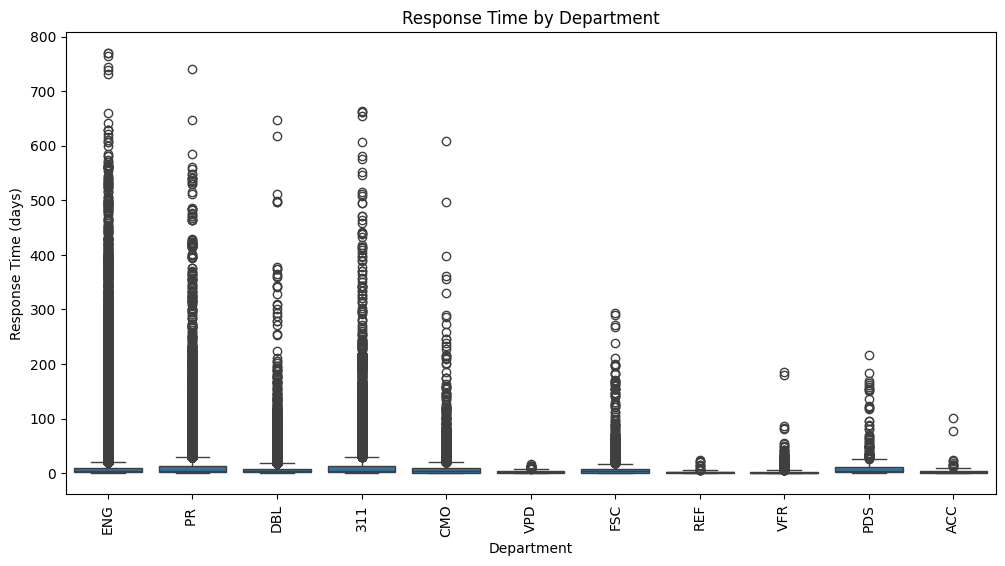

In [227]:
# Visualize response times by department
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='response_time', data=df)
plt.xticks(rotation=90)
plt.title('Response Time by Department')
plt.ylabel('Response Time (days)')
plt.xlabel('Department')
plt.show()

In [229]:
# I want to out the outliers in the response time for a better visual


# Calculate IQR
Q1 = df['response_time'].quantile(0.25)
Q3 = df['response_time'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['response_time'] >= lower_bound) & (df['response_time'] <= upper_bound)]
# df_filtered = df[df['response_time'] < 21]

# Basic statistics
print(df['response_time'].describe())




count    281205.000000
mean          4.970386
std           4.545082
min           0.000000
25%           1.414433
50%           3.532060
75%           7.357639
max          20.184028
Name: response_time, dtype: float64


In [230]:
# there are about 250 different request types, i want to map that into smaller groups for better visual and analysis.
service_requests = df
category_mapping = {
    "Environmental and Waste Management": [
        "Dead Animal Pick Up Case",
        "Abandoned Non-Recyclables-Large Case",
        "Abandoned Non-Recyclables-Small Case",
        "Abandoned Mattress Case",
        "Garbage Bin Request Case",
        "Green Bin Request Case",
        "Missed Green Bin Pickup Case",
        "Missed Garbage Bin Pickup Case",
        "Illegal Dumping Case",
        "Recycling and Disposal Facility - Landfill Inquiry Case",
        "Recycling and Disposal Facility - Transfer Station Inquiry Case",
        "Street Cleaning and Debris Pick Up Case",
        "Needle Clean Up Case",
        "Loose Litter Clean Up Case",
        "Rats and Rodents Case",
        "Feeding Wildlife Case",
        "Street Surface Water Flooding Case",
        "Commercial Waste Container Concern Case",
        "Parks Operations and Maintenance Case",
        "Parking Management Inquiry Case",
        "Disposal Facility - Landfill Inquiry Case",
        "Disposal Facility - Transfer Station Inquiry Case",
        "Abandoned Recyclables Case",
        "Sanitation Operations Inquiry Case",
        "Snow and Ice Removal From City Property Case",
        "Graffiti Management Program Case",
        "Sewer Drainage and Design Inquiry Case",
        "Street and Sidewalk Use Request Case",
    ],
    "Public Property Maintenance": [
        "Street Repair Case",
        "Sidewalk Repair Case",
        "Street Light Out Case",
        "Graffiti Removal - City Property Case",
        "Graffiti Removal - Private Property Case",
        "Graffiti Removal - Park Property Case",
        "Graffiti Removal - Commercial Waste Container Case",
        "Pavement Markings Case",
        "Park Litter Can Case",
        "Street Furniture Maintenance Case",
        "Traffic Signal Repair Case",
        "Bridge and Structures Maintenance Case",
        "Vegetation Maintenance Case",
        "Boulevard Maintenance Case",
        "Meter Out of Order Internal Audit Case",
        "Street or Traffic Light Utility Damage Case",
        "Vegetation Encroachment of City Property Case",
        "Street Furniture Litter Can Maintenance Case",
        "Property Tax Request Case",
        "City Clock Maintenance Case",
        "ZZ OLD - Private Property Tree Removal Case",
        "Preventative Maintenance Program Case",
        "Sign Repair Case",
        "Pavement Marking Maintenance Case",
    ],
    "Parks and Recreation": [
        "Park Improvement Case",
        "Urban Issues in Parks Case",
        "Parks Feedback Case",
        "Park Board Commissioner Feedback Case",
        "Parks Washroom Servicing Case",
        "Park Facility Maintenance Request",
        "Canada Geese Nests Case",
        "Recreation Feedback Case",
        "Streets Horticulture Program Inquiry Case",
        "Park Ranger Request Case",
    ],
    "Transportation and Traffic": [
        "Residential Parking Permit Request Case",
        "Parking Enforcement Transfer Case",
        "Parking Enforcement Request Case",
        "Parking Meter Request Case",
        "Traffic Management Inquiry Case",
        "Traffic Calming Case",
        "Traffic Signal Timing Concern Case",
        "Traffic and Pedestrian Signal - Modify Request Case",
        "Traffic and Pedestrian Signal - New Request Case",
        "Street Construction Concern Case",
        "Curb Ramp Request Case",
        "Traffic Sign - New Request Case",
        "Traffic Sign - Modify Request Case",
        "Pothole Case",
        "Arterial St. Curbside Sign - Modify Request Case",
        "Arterial St. Curbside Sign - New Request Case",
        "School Traffic Concern Case",
        "Transportation Design Project Inquiry Case",
        "Community Transportation Request Case",
        "Tower Crane Site Survey Case",
        "ZZ OLD - Traffic Calming Case",
    ],
    "Residential and Private Property": [
        "Noise on Private Property Case",
        "Private Property Construction Concern Case",
        "Private Property Construction Noise Case",
        "Private Property Tree Removal Concern Case",
        "Residential Cart Concern Case",
        "Sidewalk Snow and Ice Removal Bylaw Violation Case",
        "Unpermitted Construction Container Concern Case",
        "Sewer Backup Case",
        "Sewer Odour Case",
        "High Water Consumption Concern Case",
        "Damage to Water System Case",
        "Water Leak Case",
        "Water Pressure Concern Case",
        "Residential Street Curbside Sign Request Case",
        "Private Property Concern Case",
        "Private Property Inquiry Case",
    ],
    "Permits and Licenses": [
        "Business Licence Request Case",
        "Dog Licence Case",
        "Security Alarm Permit (Revenue Services) Case",
        "Security Alarm Permit (VPD) Case",
        "Water Exemption Permit Request Case",
        "Short-Term Rental Concern Case",
        "Short-Term Rental Request Case",
        "Tour Bus Permit Case",
        "Fire Inspection Request Case",
    ],
    "Feedback and Inquiries": [
        "General Feedback Case",
        "City Services Feedback Case",
        "Van311 Feedback Case",
        "Mayor and Council Feedback Case",
        "Website Feedback Case",
        "Employee Feedback Case",
        "Public Hearing Feedback Case",
        "Park Board Commissioner Feedback Case",
        "Election Inquiry Case",
        "Recreation Feedback Case",
        "Accessibility Feedback Case",
        "City Manager Feedback Case",
    ],
    "Utilities and Infrastructure": [
        "Sewer Operations Inquiry Case",
        "Sewer Construction Concern Case",
        "Waterworks General Work Request Case",
        "Water Meter Reading Request Case",
        "Waterworks Operations Construction Concern Case",
        "Sewer Maintenance Hole Concern Case",
        "Catch Basin Concern Case",
        "Sewer Utility Damage Case",
        "Locate Water Service Line or Valve Case",
        "Water Service Line Turn On or Off Request Case",
        "Water Design Inquiry Case",
        "Water Hydrant Concern Case",
        "Waterworks Request Case",
        "Utility Billing Request Case",
    ],
    "Urban Planning and Development": [
        "Urban Planning Request Case",
        "Building and Development Inquiry Case",
        "Local Improvement Program Case",
        "Gastown Public Space Plan Request Case",
        "Planner Appointment Request Case",
        "Business Licence Change of Use (Five Uses) Case",
        "Character Merit Assessment Request Case",
        "Construction Related Concerns Case",
        "Vancouver Building Bylaw Inquiry Case",
    ],
    "Emergency and Safety": [
        "Fire Safety Hazards Case",
        "Fire Prevention Inquiry Case",
        "High Angle Rescue Inquiry Case",
        "Home Safety Check Request Case",
        "Emergency Referral Tracking Report Case",
        "Snow Angel Program Request Case",
        "Request Fire Reinspection (Inspector) Case",
        "Request Fire Reinspection (Firehall) Case",
        "Animal Concern Case",
        "Animal Services Inquiry Case",
    ],
    "Sustainability and Environmental Concerns": [
        "Sustainability Inquiry Case",
        "Water Conservation Violation Case",
        "Environmental Protection Inquiry Case",
        "Environmental Contamination Concern Case",
        "Single-Use Item Bylaw Request Case",
        "Adopt a Catch Basin Program Inquiry Case",
        "Free Paint Voucher Request Case",
    ],
    "Other Services": [
        "Filming Office Request Case",
        "Filming Inquiry Case",
        "Customer Service Service Request Case",
        "Newspaper Box Concern Case",
        "Address Change Request Case",
        "Transit Related Request Case",
        "Street Furniture Request Case",
        "Special Events Office Request Case",
        "Special Events Inquiry Case",
        "Hoarding Request Case",
        "Non-Vegetative Encroachment Case",
        "Hot Topic Case",
        "Lockbox Request Case",
        "Lost Pets Case",
        "Moving and Storage Container Concern Case",
        "New Crosswalk Marking Case",
        "New Litter Can Request Case",
        "New or Relocate Street Light Pole Case",
        "Parking Meter Refund Request Case",
        "Parking Ticket Review Case",
        "Fireworks Request Case",
        "Business Patio Inquiry Case",
        "Business Support Request Case",
        "Commercial Street Curbside Sign Request Case",
        "Neighbourhood Energy Utility Request Case",
        "Neighbourhood Energy Utility Issue Case",
        "Commercial Waste Container Concern Case",
        "Traffic Operations Construction Concern Case",
        "Sign Cleaning Case",
        "City Construction Project Concern Case",
        "General Street Issues Case",
    ],
}
def categorize_service_request(request_type):
    for category, requests in category_mapping.items():
        if request_type in requests:
            return category
    return "Other"
service_requests['Category'] = service_requests['Service request type'].apply(categorize_service_request)
service_requests.to_csv('data/311service-requests.csv', index=False)

In [231]:
service_requests.head()
service_requests.tail()

,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Last modified timestamp,Address,Local area,Channel,Latitude,Longitude,geom,open_timestamp,close_date,response_time,department,Category
598848,PR - Park Rangers,Urban Issues in Parks Case,Close,Service provided,2024-10-25 18:20:43-07:00,2024-10-29,2024-10-29T21:53:45-07:00,NaN,Kensington-Cedar Cottage,Mobile App,NaN,NaN,NaN,2024-10-25 18:20:43,2024-10-29,3.235613,PR,Parks and Recreation
598849,ENG - Sewer Operations,Sewer Maintenance Hole Concern Case,Close,Further action has been planned,2024-10-25 18:36:00-07:00,2024-11-01,2024-11-01T08:54:16-07:00,786 E HASTINGS ST,Strathcona,Phone,49.280812,-123.087589,"49.28081189791, -123.08758929601",2024-10-25 18:36:00,2024-11-01,6.225000,ENG,Utilities and Infrastructure
598850,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2024-10-25 18:56:00-07:00,2024-10-29,2024-10-29T13:47:08-07:00,3429 E 45TH AV,Killarney,WEB,49.229520,-123.031338,"49.22952033949, -123.0313379635",2024-10-25 18:56:00,2024-10-29,3.211111,PR,Other
598851,ENG - Sanitation Services,Missed Green Bin Pickup Case,Close,Reviewed and no action planned,2024-10-25 19:28:00-07:00,2024-10-28,2024-10-28T20:42:03-07:00,NaN,Sunset,Phone,NaN,NaN,NaN,2024-10-25 19:28:00,2024-10-28,2.188889,ENG,Environmental and Waste Management
598854,ENG - Sanitation Services,Missed Garbage Bin Pickup Case,Close,Reviewed and no action planned,2024-10-25 21:31:00-07:00,2024-10-30,2024-10-30T06:14:27-07:00,NaN,Kerrisdale,WEB,NaN,NaN,NaN,2024-10-25 21:31:00,2024-10-30,4.103472,ENG,Environmental and Waste Management


In [232]:
# For seasonal analysis, i need to extract season out of the date.
# Create a Year-Month column
df['Year-Month'] = df['open_timestamp'].dt.to_period('M')

def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['season'] = df['Year-Month'].dt.month.apply(assign_season)

In [233]:
df.head()

,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Last modified timestamp,Address,Local area,Channel,Latitude,Longitude,geom,open_timestamp,close_date,response_time,department,Category,Year-Month,season
1,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16 20:31:00-07:00,2022-09-21,2022-09-21T09:05:01-07:00,14 W 14TH AV,Mount Pleasant,Phone,49.258205,-123.105516,"49.25820514218, -123.10551579402",2022-09-16 20:31:00,2022-09-21,4.145139,PR,Other,2022-09,Fall
2,ENG - Sanitation Services,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16 20:36:00-07:00,2022-09-22,2022-09-22T12:07:23-07:00,3180 KINGS AV,Renfrew-Collingwood,Phone,49.241261,-123.037927,"49.24126129747, -123.03792693417",2022-09-16 20:36:00,2022-09-22,5.141667,ENG,Environmental and Waste Management,2022-09,Fall
4,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16 20:58:00-07:00,2022-09-20,2022-09-20T10:20:52-07:00,NaN,NaN,WEB,NaN,NaN,NaN,2022-09-16 20:58:00,2022-09-20,3.126389,DBL,Urban Planning and Development,2022-09,Fall
5,ENG - Streets Operations,Urban Issues on City Property Case,Close,Unknown,2022-09-16 21:39:51-07:00,2022-09-28,2022-09-28T14:08:22-07:00,NaN,Strathcona,Mobile App,NaN,NaN,NaN,2022-09-16 21:39:51,2022-09-28,11.097326,ENG,Other,2022-09,Fall
7,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16 22:15:00-07:00,2022-09-23,2022-09-23T11:20:14-07:00,NaN,Downtown,WEB,NaN,NaN,NaN,2022-09-16 22:15:00,2022-09-23,6.072917,DBL,Urban Planning and Development,2022-09,Fall


In [234]:
# I am going to drop some columns to reduce size of file which i would upload to github for EDA.

columns_to_drop = ['Department', 'Last modified timestamp', 'Address', 'Latitude', 'Longitude', 'geom']

# Drop the specified columns
df_dropped = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
df_dropped.head()

,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Local area,Channel,open_timestamp,close_date,response_time,department,Category,Year-Month,season
1,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16 20:31:00-07:00,2022-09-21,Mount Pleasant,Phone,2022-09-16 20:31:00,2022-09-21,4.145139,PR,Other,2022-09,Fall
2,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16 20:36:00-07:00,2022-09-22,Renfrew-Collingwood,Phone,2022-09-16 20:36:00,2022-09-22,5.141667,ENG,Environmental and Waste Management,2022-09,Fall
4,Building and Development Inquiry Case,Close,Service provided,2022-09-16 20:58:00-07:00,2022-09-20,NaN,WEB,2022-09-16 20:58:00,2022-09-20,3.126389,DBL,Urban Planning and Development,2022-09,Fall
5,Urban Issues on City Property Case,Close,Unknown,2022-09-16 21:39:51-07:00,2022-09-28,Strathcona,Mobile App,2022-09-16 21:39:51,2022-09-28,11.097326,ENG,Other,2022-09,Fall
7,Building and Development Inquiry Case,Close,Service provided,2022-09-16 22:15:00-07:00,2022-09-23,Downtown,WEB,2022-09-16 22:15:00,2022-09-23,6.072917,DBL,Urban Planning and Development,2022-09,Fall


In [235]:
#export final data and upload to github
df_dropped.to_csv('data/van311servicerequest_final.csv', index=False)

## EDA


In [205]:
# Import cleaned data from github
df = pd.read_csv('https://raw.githubusercontent.com/0x1AY/Van311-Statistical-Analysis/refs/heads/master/data/van311servicerequest_final.csv')
df.head()

,Status,Closure reason,Service request open timestamp,Service request close date,Local area,Channel,open_timestamp,close_date,response_time,department,Category,Year-Month,season
0,Close,Unknown,2022-09-16 20:21:59-07:00,2023-10-19,Sunset,Phone,2022-09-16 20:21:59,2023-10-19,397.151400,ENG,Transportation and Traffic,2022-09,Fall
1,Close,Further action has been planned,2022-09-16 20:31:00-07:00,2022-09-21,Mount Pleasant,Phone,2022-09-16 20:31:00,2022-09-21,4.145139,PR,Other,2022-09,Fall
2,Close,Issue not found or inaccessible,2022-09-16 20:36:00-07:00,2022-09-22,Renfrew-Collingwood,Phone,2022-09-16 20:36:00,2022-09-22,5.141667,ENG,Environmental and Waste Management,2022-09,Fall
3,Close,Unknown,2022-09-16 20:37:36-07:00,2022-09-16,NaN,Phone,2022-09-16 20:37:36,2022-09-16,-0.859444,ENG,Transportation and Traffic,2022-09,Fall
4,Close,Service provided,2022-09-16 20:58:00-07:00,2022-09-20,NaN,WEB,2022-09-16 20:58:00,2022-09-20,3.126389,DBL,Urban Planning and Development,2022-09,Fall


In [206]:

# Summary statistics for response time

response_stats = df['response_time'].describe()
print(response_stats)

# Count of requests per department
dept_counts = df['department'].value_counts()
print(dept_counts)

# Count of requests by channel
channel_counts = df['Channel'].value_counts()
print(channel_counts)

count    404809.000000
mean          7.244840
std          23.401933
min          -0.999745
25%           0.089583
50%           2.388206
75%           6.645197
max         769.622118
Name: response_time, dtype: float64
department
ENG    209767
DBL     98280
PR      38922
311     24209
CMO     17137
FSC      6465
VFR      4470
VPD      2135
ACC      2038
PDS       777
REF       609
Name: count, dtype: int64
Channel
WEB             179033
Phone           151027
Mobile App       68169
Chat              3209
E-mail            2361
Social Media       674
Unknown            272
Mail                43
Mail Out            20
Face To Face         1
Name: count, dtype: int64


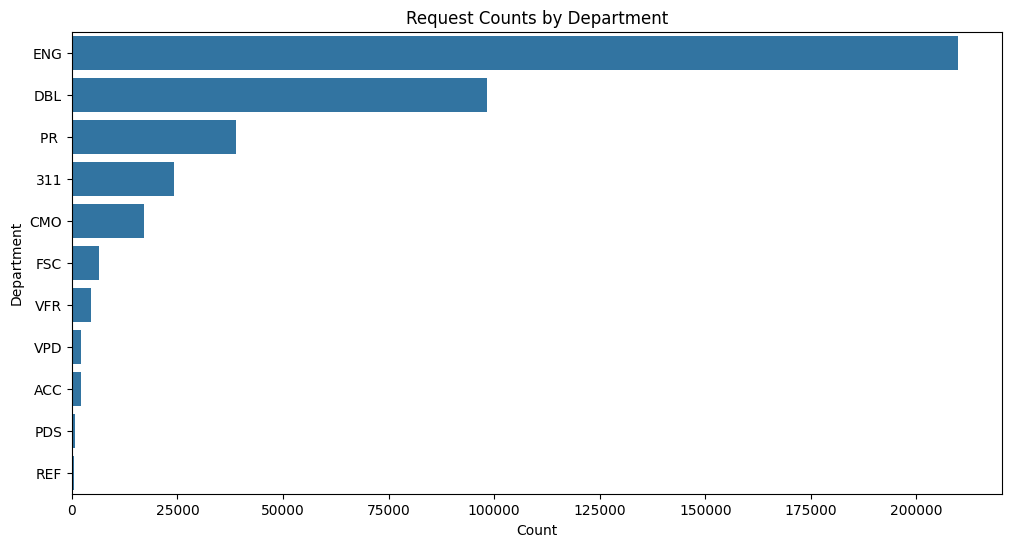

In [22]:

# Plot request counts by department
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='department', order=df['department'].value_counts().index)
plt.title('Request Counts by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

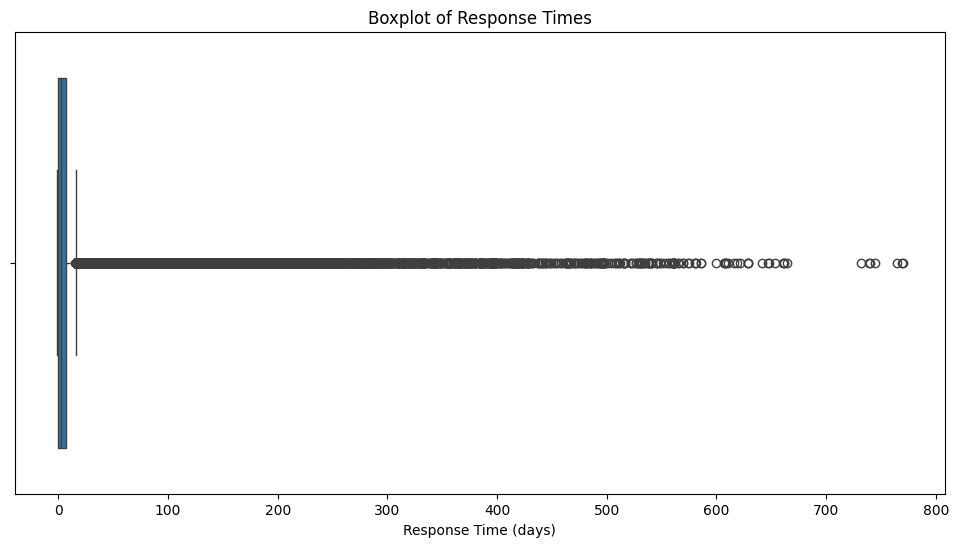

In [43]:


# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['response_time'])
plt.title('Boxplot of Response Times')
plt.xlabel('Response Time (days)')
plt.show()

In [41]:
# Calculate IQR
df = service_requests
Q1 = df['response_time'].quantile(0.25)
Q3 = df['response_time'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['response_time'] >= lower_bound) & (df['response_time'] <= upper_bound)]

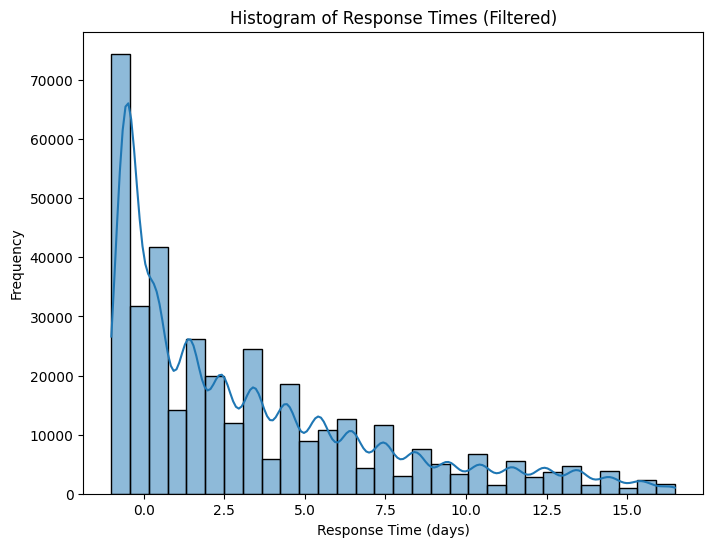

In [42]:
# Histogram with capped/filtered response time
plt.figure(figsize=(8, 6))
sns.histplot(filtered_df['response_time'], bins=30, kde=True)
plt.title('Histogram of Response Times (Filtered)')
plt.xlabel('Response Time (days)')
plt.ylabel('Frequency')
plt.show()

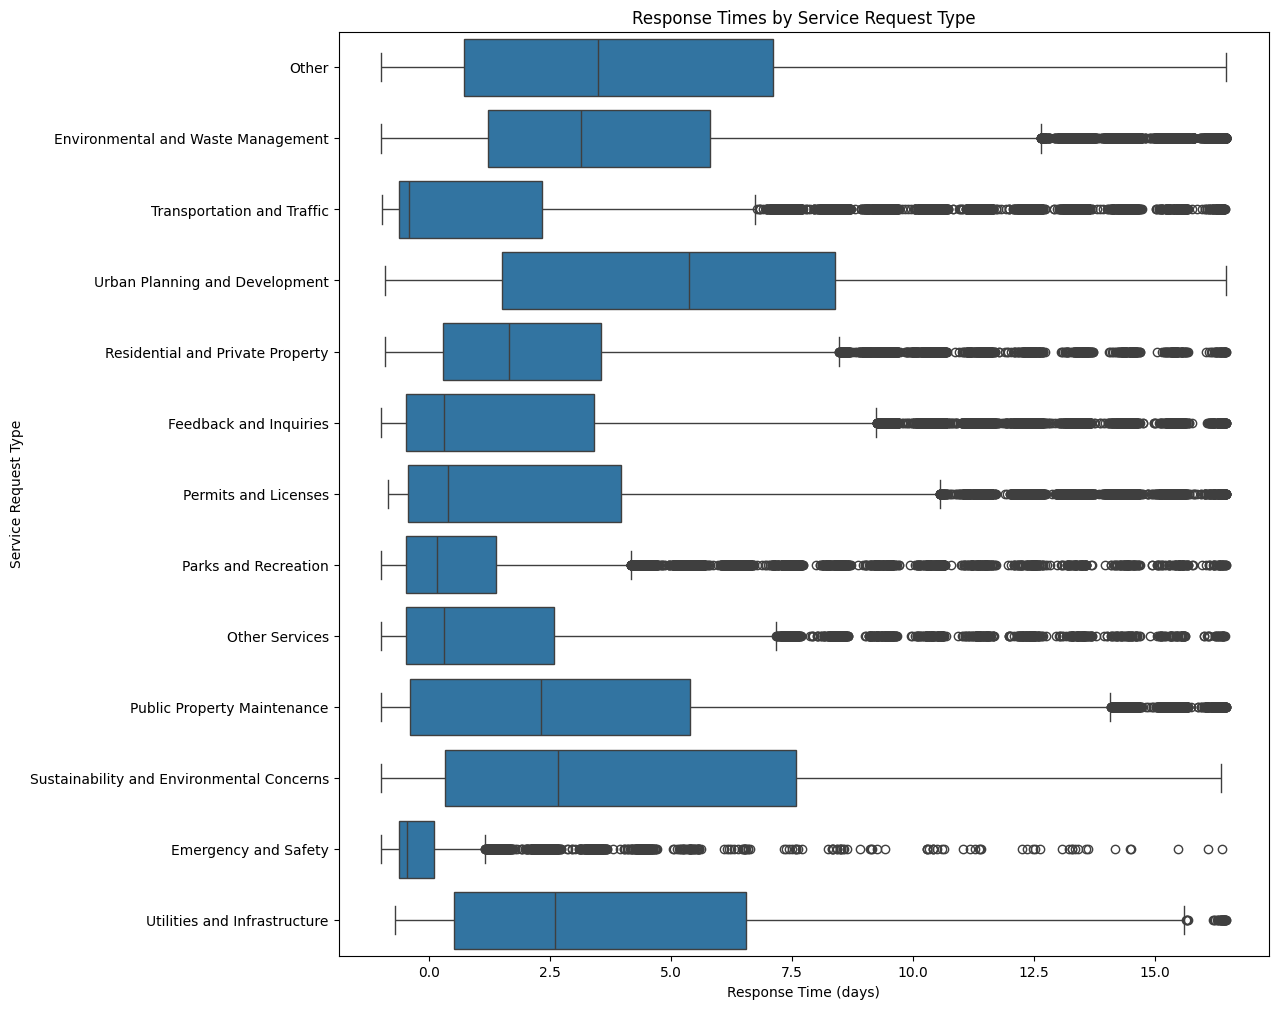

In [53]:
# Boxplot for response time by request type
plt.figure(figsize=(12, 12))
sns.boxplot(data=filtered_df, x='response_time', y='Category')
plt.title('Response Times by Service Request Type')
plt.xlabel('Response Time (days)')
plt.ylabel('Service Request Type')
plt.show()

/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_65778/1818163717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Month'] = df['open_timestamp'].dt.to_period('M')


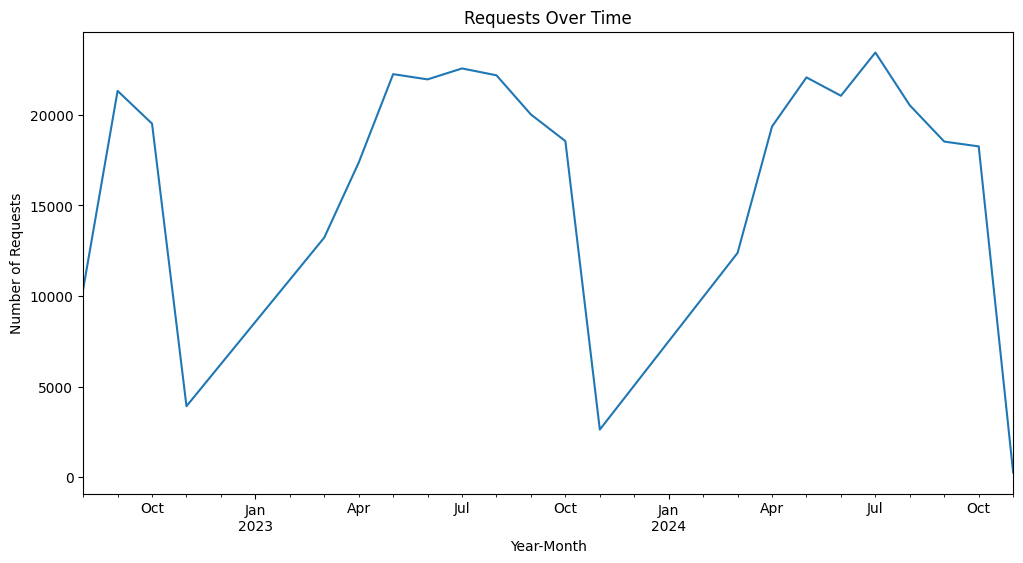

In [56]:
# Create a Year-Month column
# df = filtered_df
df['Year-Month'] = df['open_timestamp'].dt.to_period('M')

# Plot requests over time
monthly_requests = df.groupby('Year-Month').size()
plt.figure(figsize=(12, 6))
monthly_requests.plot()
plt.title('Requests Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Requests')
plt.show()

# EDA Insights

The EDA has generated useful visualizations and summaries of your data.  
Here are the insights and next steps based on your results:

---

## Insights from the EDA

1. **Summary Statistics for Response Time**:

   - The mean response time is around **7.24 days**, but the high standard deviation (**23.4 days**) and the maximum (**769.6 days**) suggest significant outliers.
   - The median (**2.39 days**) indicates the central tendency, and the interquartile range shows that most data points are below **6.65 days**.

2. **Departmental Analysis**:

   - The bar chart reveals that departments like **ENG** and **DBL** handle the most service requests. These departments may need further analysis to evaluate their efficiency.
   - Departments with fewer requests (e.g., **VFR**, **ACC**, and **PDS**) could indicate specialized operations.

3. **Response Time Outliers**:

   - The boxplot shows extreme outliers in response times. After filtering out values beyond **1.5 times the IQR**, the distribution of response times becomes more interpretable.

4. **Filtered Response Times**:

   - After filtering outliers, the histogram displays a clearer distribution of response times. Most requests are resolved within **10 days**, with a steep drop-off for longer durations.

5. **Service Request Type Analysis**:

   - Boxplots of response times by service request type highlight variability between categories.
   - Categories like **“Utilities and Infrastructure”** and **“Emergency and Safety”** appear to have faster response times, while others like **“Urban Planning and Development”** show longer delays.

6. **Temporal Trends**:
   - The time series plot of request counts shows peaks and troughs over time, suggesting seasonal or monthly trends.
   - For example, a higher request volume during certain months might indicate resource strain or user behavior patterns.


## Exploring reaseach questions


In [104]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Department'], df['Service request type'])

# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Squared Test: Statistic={chi2_stat:.3f}, P-value={p_value:.3f}")

Chi-Squared Test: Statistic=23478922.000, P-value=0.000


In [105]:
from scipy.stats import ttest_ind
df = filtered_df
# Filter data for two departments
dept1 = df[df['department'] == 'ENG']['response_time']
dept2 = df[df['department'] == 'VPD']['response_time']

# Perform t-test
t_stat, p_value = ttest_ind(dept1, dept2, equal_var=False)  # Assume unequal variances
print(f"T-Test: Statistic={t_stat:.3f}, P-value={p_value:.3f}")

T-Test: Statistic=45.514, P-value=0.000


In [109]:
from scipy.stats import ttest_ind

# Filter data for two departments
phone = df[df['Channel'] == 'Phone']['response_time']
web = df[df['Channel'] == 'WEB']['response_time']

# Perform t-test
t_stat, p_value = ttest_ind(phone, web, equal_var=False)  # Assume unequal variances
print(f"T-Test: Statistic={t_stat:.3f}, P-value={p_value:.5f}")

T-Test: Statistic=-63.331, P-value=0.00000


In [110]:
# Chi-squared test for request counts
monthly_counts = df['Year-Month'].value_counts()
chi2_stat, p_value, _, _ = chi2_contingency([monthly_counts.values])
print(f"Chi-Squared Test: Statistic={chi2_stat:.3f}, P-value={p_value:.3f}")

# F-test for response time variances
response_times_by_month = [df[df['Year-Month'] == month]['response_time']
                           for month in df['Year-Month'].unique()]
f_stat, p_value = f_oneway(*response_times_by_month)
print(f"F-Test: Statistic={f_stat:.3f}, P-value={p_value:.3f}")

Chi-Squared Test: Statistic=0.000, P-value=1.000
F-Test: Statistic=139.753, P-value=0.000


In [111]:
# Group response times by service request type
response_times_by_type = [df[df['Service request type'] == req_type]['response_time']
                          for req_type in df['Service request type'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*response_times_by_type)
print(f"One-Way ANOVA: Statistic={f_stat:.3f}, P-value={p_value:.3f}")

One-Way ANOVA: Statistic=754.048, P-value=0.000


In [106]:
df.head()

,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Last modified timestamp,Address,Local area,Channel,Latitude,Longitude,geom,open_timestamp,close_date,department,response_time,Category,Year-Month
1,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16 20:31:00-07:00,2022-09-21,2022-09-21T09:05:01-07:00,14 W 14TH AV,Mount Pleasant,Phone,49.258205,-123.105516,"49.25820514218, -123.10551579402",2022-09-16 20:31:00,2022-09-21,PR,4.145139,Other,2022-09
2,ENG - Sanitation Services,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16 20:36:00-07:00,2022-09-22,2022-09-22T12:07:23-07:00,3180 KINGS AV,Renfrew-Collingwood,Phone,49.241261,-123.037927,"49.24126129747, -123.03792693417",2022-09-16 20:36:00,2022-09-22,ENG,5.141667,Environmental and Waste Management,2022-09
3,ENG - Parking Enforcement and Operations,Parking Enforcement Transfer Case,Close,Unknown,2022-09-16 20:37:36-07:00,2022-09-16,2022-09-16T20:37:36-07:00,NaN,NaN,Phone,NaN,NaN,NaN,2022-09-16 20:37:36,2022-09-16,ENG,-0.859444,Transportation and Traffic,2022-09
4,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16 20:58:00-07:00,2022-09-20,2022-09-20T10:20:52-07:00,NaN,NaN,WEB,NaN,NaN,NaN,2022-09-16 20:58:00,2022-09-20,DBL,3.126389,Urban Planning and Development,2022-09
5,ENG - Streets Operations,Urban Issues on City Property Case,Close,Unknown,2022-09-16 21:39:51-07:00,2022-09-28,2022-09-28T14:08:22-07:00,NaN,Strathcona,Mobile App,NaN,NaN,NaN,2022-09-16 21:39:51,2022-09-28,ENG,11.097326,Other,2022-09


In [116]:
from scipy.stats import ttest_ind

# Filter data for the two departments
eng_response = df[df['department'] == 'ENG']['response_time']
vpd_response = df[df['department'] == 'VPD']['response_time']

# Perform t-test
t_stat, p_value = ttest_ind(eng_response, vpd_response, equal_var=False)  # Assume unequal variance
print(f"T-Test: Statistic={t_stat:.3f}, P-value={p_value:.3f}")
print(f"eng_respons mean:{eng_response.mean()}, vpd_response mean: {vpd_response.mean()}")
print(f"eng_respons std:{eng_response.std()}, vpd_response std: {vpd_response.std()}")
print(f"eng_respons len:{len(eng_response)}, vpd_response len: {len(vpd_response)}")


T-Test: Statistic=45.514, P-value=0.000
eng_respons mean:3.627570502375232, vpd_response mean: 1.385117182756527
eng_respons std:4.1744503476923684, vpd_response std: 2.233224680400128
eng_respons len:190383, vpd_response len: 2135


In [123]:
# Filter data for the two channels
phone_response = df[df['Channel'] == 'Phone']['response_time']
web_response = df[df['Channel'] == 'WEB']['response_time']

# Perform t-test
t_stat, p_value = ttest_ind(phone_response, web_response, equal_var=False)
print(f"T-Test: Statistic={t_stat:.3f}, P-value={p_value:.3f}")
phone_response.mean()
web_response.mean()
phone_response.std()
web_response.std()


T-Test: Statistic=-63.331, P-value=0.000


np.float64(4.308612128351397)

In [124]:
from scipy.stats import chi2_contingency

# Group data by month
monthly_counts = df['Year-Month'].value_counts()

# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency([monthly_counts.values])
print(f"Chi-Squared Test: Statistic={chi2_stat:.3f}, P-value={p_value:.3f}")

Chi-Squared Test: Statistic=0.000, P-value=1.000


In [125]:
from scipy.stats import f_oneway

# Group response times by local area
local_area_groups = [df[df['Local area'] == area]['response_time'] for area in df['Local area'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*local_area_groups)
print(f"F-Test: Statistic={f_stat:.3f}, P-value={p_value:.3f}")

F-Test: Statistic=nan, P-value=nan


/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_6124/1860532511.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(*local_area_groups)


In [127]:
# Group response times by service request type
request_type_groups = [df[df['Service request type'] == req_type]['response_time']
                       for req_type in df['Service request type'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*request_type_groups)
print(f"One-Way ANOVA: Statistic={f_stat:.3f}, P-value={p_value:.3f}")

One-Way ANOVA: Statistic=754.048, P-value=0.000


In [135]:
df['response_time'].max()

np.float64(16.478472222222223)

ENG Response Time Normality Test:
ShapiroResult(statistic=np.float64(0.8779448776874443), pvalue=np.float64(7.586864840730316e-132))

VPD Response Time Normality Test:
ShapiroResult(statistic=np.float64(0.8200155623323031), pvalue=np.float64(8.724046470826486e-44))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 190383.
  res = hypotest_fun_out(*samples, **kwds)


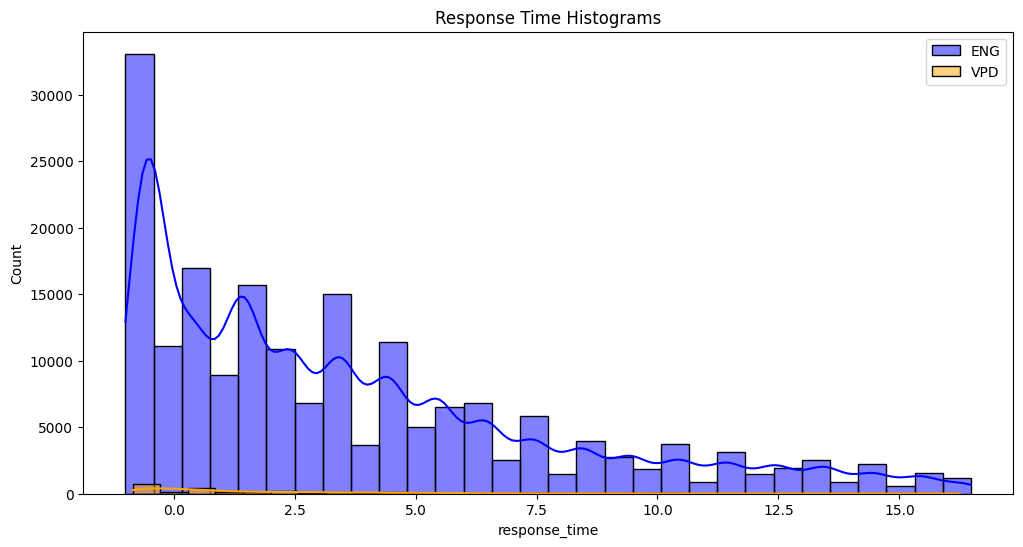

In [129]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Filter response times for department comparison
eng_response = df[df['department'] == 'ENG']['response_time']
vpd_response = df[df['department'] == 'VPD']['response_time']

# Shapiro-Wilk Test for Normality
print("ENG Response Time Normality Test:")
print(shapiro(eng_response))
print("\nVPD Response Time Normality Test:")
print(shapiro(vpd_response))

# Plot histograms and Q-Q plots
plt.figure(figsize=(12, 6))
sns.histplot(eng_response, kde=True, bins=30, label="ENG", color='blue')
sns.histplot(vpd_response, kde=True, bins=30, label="VPD", color='orange')
plt.legend()
plt.title("Response Time Histograms")
plt.show()

In [130]:
from scipy.stats import levene

# Levene's Test for Homogeneity of Variance
stat, p_value = levene(eng_response, vpd_response)
print(f"Levene's Test Statistic={stat}, P-value={p_value}")

Levene's Test Statistic=635.463227241903, P-value=5.477497232650836e-140


In [137]:
# Filter data for the two channels (e.g., 'Phone' and 'WEB')
phone_response = df[df['Channel'] == 'Phone']['response_time'].dropna()
web_response = df[df['Channel'] == 'WEB']['response_time'].dropna()

# Check for normality using the Shapiro-Wilk Test
print("Shapiro-Wilk Test for Normality:")
_, p_phone = stats.shapiro(phone_response)
_, p_web = stats.shapiro(web_response)
print(f"Phone: p-value = {p_phone}")
print(f"WEB: p-value = {p_web}")

# Check for equal variance using Levene's Test
print("\nLevene's Test for Equal Variances:")
_, p_levene = stats.levene(phone_response, web_response)
print(f"Levene's Test p-value = {p_levene}")

# Perform appropriate test based on normality and variance results
if p_phone > 0.05 and p_web > 0.05:  # Both samples are normally distributed
    print("\nPerforming Independent Two-Sample t-Test:")
    equal_var = p_levene > 0.05  # Use equal variance if Levene's test is not significant
    t_stat, p_ttest = stats.ttest_ind(phone_response, web_response, equal_var=equal_var)
    print(f"T-Test: Statistic = {t_stat}, p-value = {p_ttest}")
else:
    print("\nPerforming Mann-Whitney U Test (Non-Parametric):")
    u_stat, p_mannwhitney = stats.mannwhitneyu(phone_response, web_response, alternative='two-sided')
    print(f"Mann-Whitney U Test: Statistic = {u_stat}, p-value = {p_mannwhitney}")

# Compute Confidence Interval for t-Test (if applicable)
if p_phone > 0.05 and p_web > 0.05:  # If normality holds
    phone_mean = np.mean(phone_response)
    web_mean = np.mean(web_response)
    phone_std = np.std(phone_response, ddof=1)
    web_std = np.std(web_response, ddof=1)
    n_phone = len(phone_response)
    n_web = len(web_response)
    
    # Compute standard error
    se = np.sqrt((phone_std**2 / n_phone) + (web_std**2 / n_web))
    
    # Compute t critical value (two-tailed)
    alpha = 0.05
    dof = n_phone + n_web - 2
    t_crit = stats.t.ppf(1 - alpha/2, df=dof)
    
    # Confidence interval
    mean_diff = phone_mean - web_mean
    ci_lower = mean_diff - t_crit * se
    ci_upper = mean_diff + t_crit * se
    print(f"\n95% Confidence Interval for Mean Difference: ({ci_lower:.3f}, {ci_upper:.3f})")

Shapiro-Wilk Test for Normality:
Phone: p-value = 3.2313582648942695e-137
WEB: p-value = 1.3982725246936472e-130

Levene's Test for Equal Variances:
Levene's Test p-value = 0.0

Performing Mann-Whitney U Test (Non-Parametric):
Mann-Whitney U Test: Statistic = 9678424968.5, p-value = 0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 138932.
  res = hypotest_fun_out(*samples, **kwds)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 164257.
  res = hypotest_fun_out(*samples, **kwds)


In [136]:
from scipy.stats import chi2_contingency

# Group by Year-Month
monthly_counts = df['Year-Month'].value_counts()

# Chi-Squared Test
chi2_stat, p_val, dof, expected = chi2_contingency([monthly_counts.values])
print(f"Chi-Squared Statistic={chi2_stat}, P-value={p_val}")

Chi-Squared Statistic=0.0, P-value=1.0


In [138]:
from scipy.stats import f_oneway

# Group response times by local area
areas = [df[df['Local area'] == area]['response_time'] for area in df['Local area'].unique()]

# Perform One-Way ANOVA
stat, p_value = f_oneway(*areas)
print(f"ANOVA Statistic={stat}, P-value={p_value}")

ANOVA Statistic=nan, P-value=nan


/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_6124/2467876631.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = f_oneway(*areas)


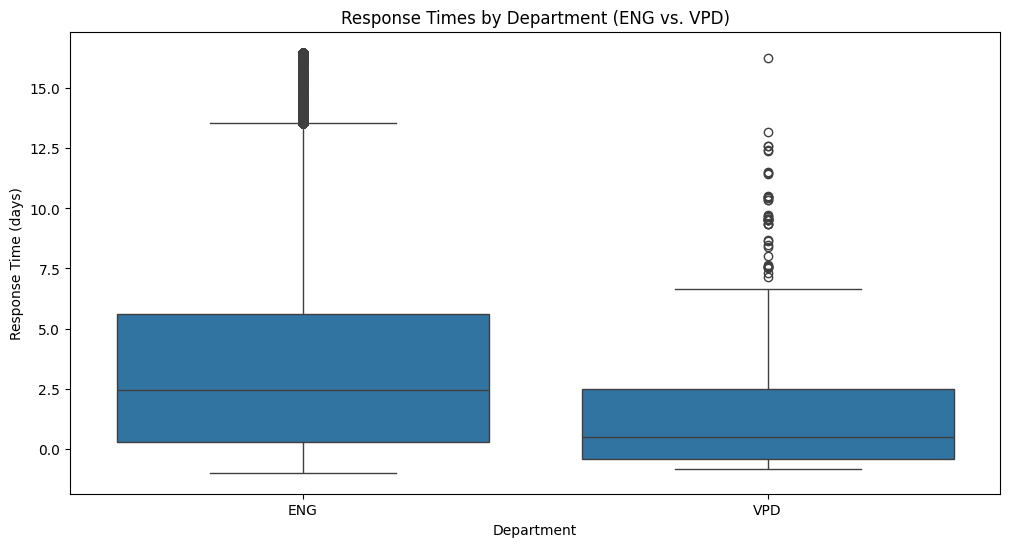

In [139]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='response_time', data=df[df['department'].isin(['ENG', 'VPD'])])
plt.title('Response Times by Department (ENG vs. VPD)')
plt.xlabel('Department')
plt.ylabel('Response Time (days)')
plt.show()

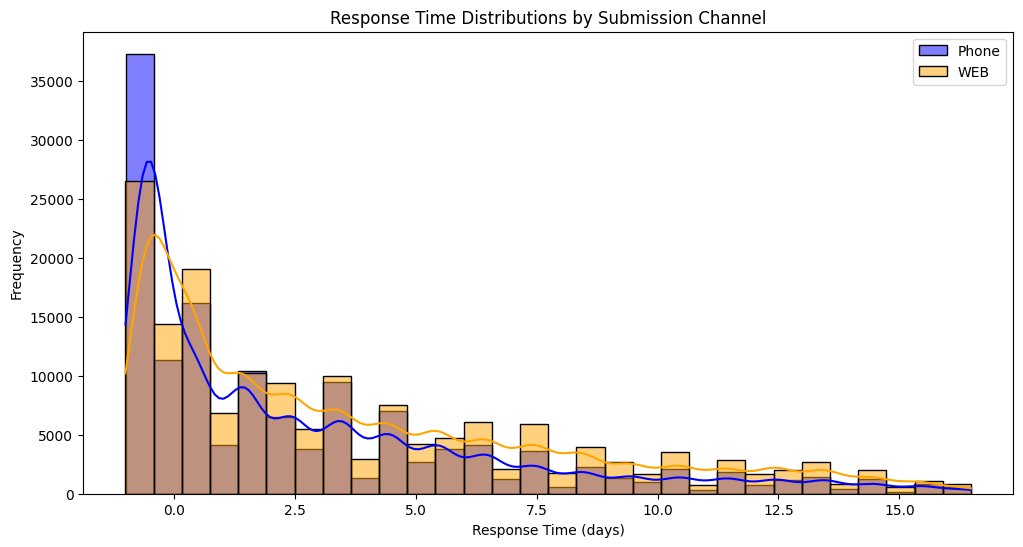

In [140]:
plt.figure(figsize=(12, 6))
sns.histplot(phone_response, bins=30, kde=True, color='blue', label='Phone')
sns.histplot(web_response, bins=30, kde=True, color='orange', label='WEB')
plt.title('Response Time Distributions by Submission Channel')
plt.xlabel('Response Time (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [149]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['season'] = df['Year-Month'].dt.month.apply(assign_season)

/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_6124/184804653.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['Year-Month'].dt.month.apply(assign_season)


In [171]:
df[50000:]

,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Last modified timestamp,Address,Local area,Channel,Latitude,Longitude,geom,open_timestamp,close_date,department,response_time,Category,Year-Month,season
79160,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2023-08-23 17:39:00-07:00,2023-08-28,2023-08-28T09:50:24-07:00,4504 WALDEN ST,Riley Park,Phone,49.244322,-123.099586,"49.24432198489, -123.09958552345",2023-08-23 17:39:00,2023-08-28,PR,4.264583,Other,2023-08,Summer
79161,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2023-08-23 17:54:00-07:00,2023-08-31,2023-08-31T13:03:18-07:00,NaN,Renfrew-Collingwood,WEB,NaN,NaN,NaN,2023-08-23 17:54:00,2023-08-31,DBL,7.254167,Urban Planning and Development,2023-08,Summer
79164,ENG - Parking Enforcement and Operations,Parking Enforcement Transfer Case,Close,Unknown,2023-08-23 18:26:36-07:00,2023-08-23,2023-08-23T18:26:36-07:00,NaN,NaN,Phone,NaN,NaN,NaN,2023-08-23 18:26:36,2023-08-23,ENG,-0.768472,Transportation and Traffic,2023-08,Summer
79165,PR - Park Rangers,Park Ranger Request Case,Close,Reviewed and no action planned,2023-08-23 18:36:00-07:00,2023-08-29,2023-08-29T08:17:13-07:00,999 CHARLESON,Fairview,Phone,49.267253,-123.124239,"49.26725269494, -123.12423910739",2023-08-23 18:36:00,2023-08-29,PR,5.225000,Parks and Recreation,2023-08,Summer
79166,ENG - Traffic and Electrical Operations and De...,Sign Repair Case,Close,Service provided,2023-08-23 18:57:48-07:00,2023-08-25,2023-08-25T09:39:55-07:00,5000 MCHARDY ST and CLIVE AV,Renfrew-Collingwood,Phone,49.239015,-123.035105,"49.23901461663, -123.03510516758",2023-08-23 18:57:48,2023-08-25,ENG,1.209861,Public Property Maintenance,2023-08,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598849,ENG - Sewer Operations,Sewer Maintenance Hole Concern Case,Close,Further action has been planned,2024-10-25 18:36:00-07:00,2024-11-01,2024-11-01T08:54:16-07:00,786 E HASTINGS ST,Strathcona,Phone,49.280812,-123.087589,"49.28081189791, -123.08758929601",2024-10-25 18:36:00,2024-11-01,ENG,6.225000,Utilities and Infrastructure,2024-10,Fall
598850,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2024-10-25 18:56:00-07:00,2024-10-29,2024-10-29T13:47:08-07:00,3429 E 45TH AV,Killarney,WEB,49.229520,-123.031338,"49.22952033949, -123.0313379635",2024-10-25 18:56:00,2024-10-29,PR,3.211111,Other,2024-10,Fall
598851,ENG - Sanitation Services,Missed Green Bin Pickup Case,Close,Reviewed and no action planned,2024-10-25 19:28:00-07:00,2024-10-28,2024-10-28T20:42:03-07:00,NaN,Sunset,Phone,NaN,NaN,NaN,2024-10-25 19:28:00,2024-10-28,ENG,2.188889,Environmental and Waste Management,2024-10,Fall
598852,311 Contact Centre,Emergency Referral Tracking Report Case,Close,Closed automatically and sent to service group,2024-10-25 19:59:28-07:00,2024-10-25,2024-10-25T19:59:41-07:00,NaN,NaN,Phone,NaN,NaN,NaN,2024-10-25 19:59:28,2024-10-25,311,-0.832963,Emergency and Safety,2024-10,Fall


In [172]:
df.to_csv('data/filtered_data.csv', index=False)

In [167]:
# Step 1: Filter data for base on years
df_2024 = df[df['open_timestamp'].dt.year == 2024]
df_2023 = df[df['open_timestamp'].dt.year == 2023]
df_2022 = df[df['open_timestamp'].dt.year == 2022]



# Step 2: Group by 'season' and count service requests
season_counts = df_2024['season'].value_counts()

# Step 3: Perform the Chi-Square test
observed = season_counts.values
expected = [observed.sum() / len(observed)] * len(observed)  # Equal distribution assumption

chi2, p_value, dof, expected = chi2_contingency([observed, expected])

# Step 4: Output the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value:.3f}")
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. The number of service requests depends on the season.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The number of service requests is independent of the season.")

Chi-Square Test Results:
Chi-Square Statistic: 3989.9757146649326
p-value: 0.000
Conclusion: Reject the null hypothesis. The number of service requests depends on the season.


In [159]:
df_2024.describe()

,Service request close date,Latitude,Longitude,open_timestamp,close_date,response_time
count,155824,49689.000000,49689.000000,155824,155824,155824.000000
mean,2024-07-08 07:55:17.589074944,49.257653,-123.103962,2024-07-05 04:27:42.667098624,2024-07-08 07:55:17.589074944,3.144154
min,2024-03-10 00:00:00,49.200530,-123.224219,2024-03-10 03:35:55,2024-03-10 00:00:00,-0.999745
25%,2024-05-14 00:00:00,49.240775,-123.133888,2024-05-10 13:41:00,2024-05-14 00:00:00,-0.364010
50%,2024-07-09 00:00:00,49.262310,-123.103192,2024-07-05 04:40:24.500000,2024-07-09 00:00:00,1.602778
75%,2024-09-03 00:00:00,49.277072,-123.069797,2024-08-28 18:49:16.249999872,2024-09-03 00:00:00,5.309141
max,2024-11-03 00:00:00,49.313896,-123.023101,2024-11-02 20:33:46,2024-11-03 00:00:00,16.478472
std,NaN,0.022861,0.042987,NaN,NaN,4.088083


/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_6124/3988890196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Month'] = df['open_timestamp'].dt.to_period('M')


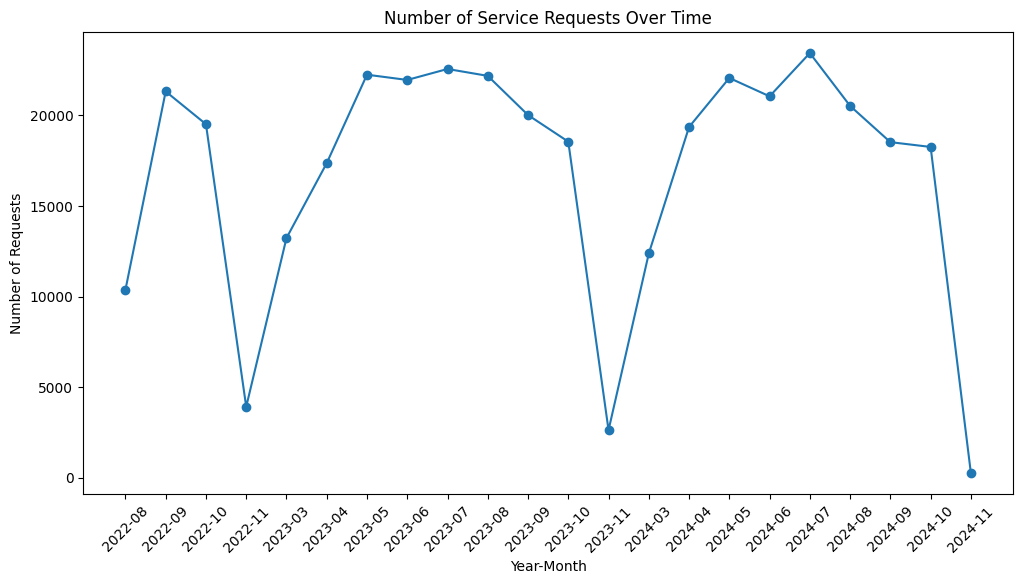

In [141]:
df['Year-Month'] = df['open_timestamp'].dt.to_period('M')
monthly_counts = df.groupby('Year-Month').size()
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o')
plt.title('Number of Service Requests Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()

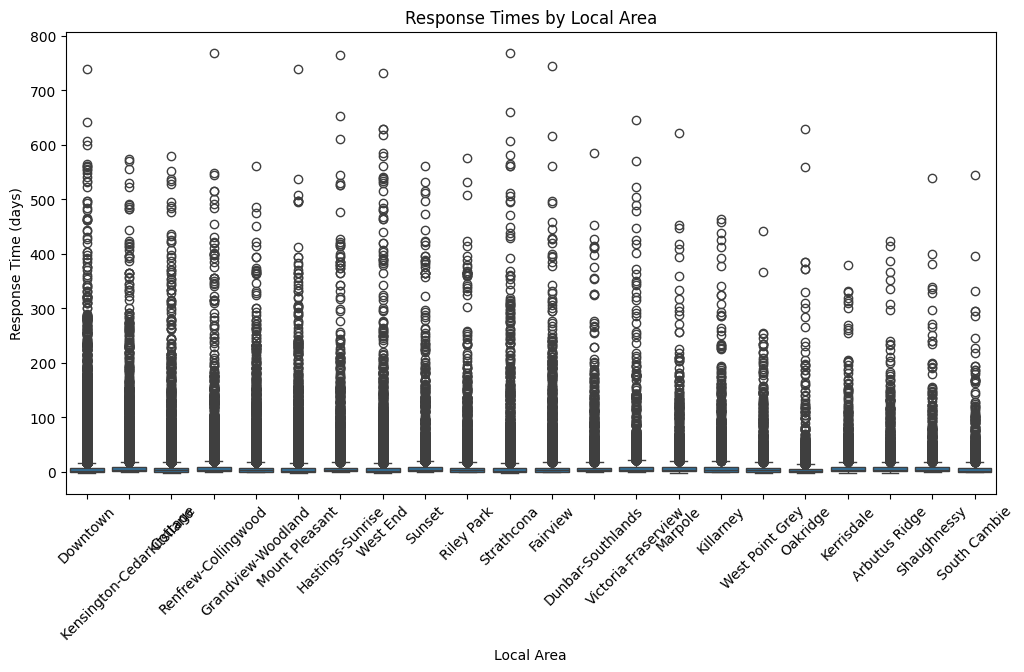

In [180]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Local area', y='response_time', data=df, order=df['Local area'].value_counts().index)
plt.title('Response Times by Local Area')
plt.xlabel('Local Area')
plt.ylabel('Response Time (days)')
plt.xticks(rotation=45)
plt.show()

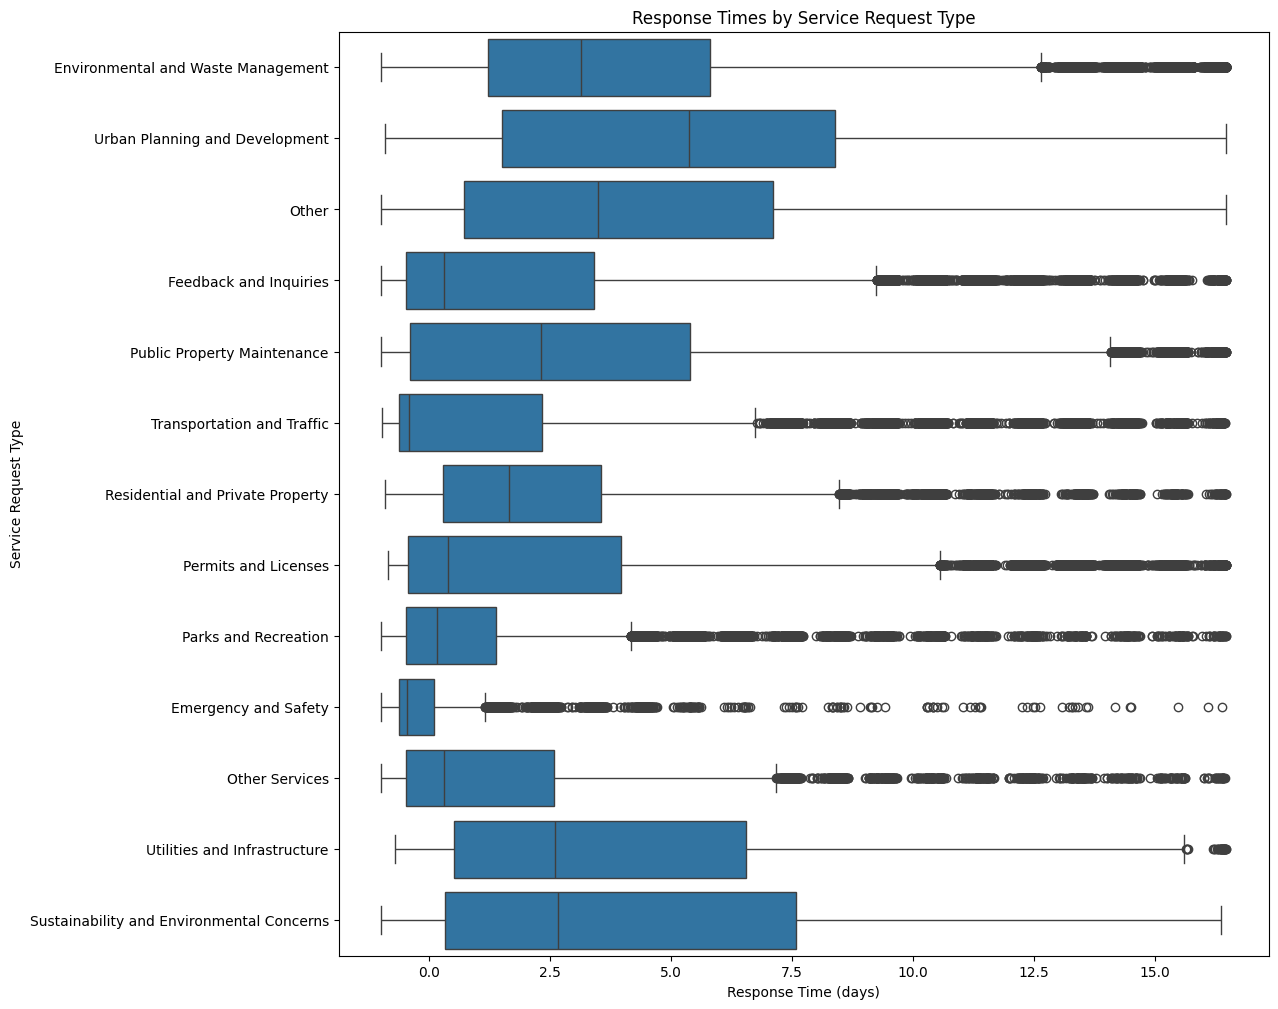

In [148]:
plt.figure(figsize=(12, 12))
sns.boxplot(y='Category', x='response_time', data=df, order=df['Category'].value_counts().index)
plt.title('Response Times by Service Request Type')
plt.xlabel('Response Time (days)')
plt.ylabel('Service Request Type')
plt.show()

Below is the markdown version of the comprehensive report, formatted for use in an IPython Notebook (.ipynb):

# Comprehensive Report on Hypothesis Testing Results

---

## 1. Comparison of Response Times Between Departments

- **Test Used**: Two-sample t-test.
- **Null Hypothesis (H₀)**: The mean response time for the Engineering Management (ENG) department is equal to the mean response time for the Vancouver Police Department (VPD).
- **Alternative Hypothesis (H₁)**: The mean response time for the ENG department is not equal to the mean response time for the VPD department.
- **Assumptions**:
  - **Normality**: Shapiro-Wilk test was used to check normality for ENG and VPD response times. Both had p-values indicating deviations from normality; however, due to large sample sizes, the Central Limit Theorem (CLT) allows t-test validity.
  - **Equal Variance**: Levene’s test indicated unequal variances.
- **Results**:
  - Test Statistic (t) = **45.514**
  - p-value < **0.001**
- **Conclusion**: Reject H₀. There is a statistically significant difference in response times between ENG and VPD.

---

## 2. Comparison of Response Times by Submission Channel (Phone vs. WEB)

- **Test Used**: Mann-Whitney U test (non-parametric).
- **Null Hypothesis (H₀)**: The response time distributions for Phone and WEB submission channels are the same.
- **Alternative Hypothesis (H₁)**: The response time distributions for Phone and WEB submission channels are different.
- **Assumptions**:
  - **Normality**: Shapiro-Wilk test indicated non-normality for both Phone and WEB response times.
  - **Equal Variance**: Levene’s test not applicable due to the use of a non-parametric test.
- **Results**:
  - Test Statistic (U) = **9,678,245.5**
  - p-value < **0.001**
- **Conclusion**: Reject H₀. There is a significant difference in response times between Phone and WEB submission channels.

---

## 3. Seasonal Patterns in Service Requests

- **Test Used**: Chi-Square Test for Independence.
- **Null Hypothesis (H₀)**: The number of service requests is independent of the season (Year-Month).
- **Alternative Hypothesis (H₁)**: The number of service requests is dependent on the season (Year-Month).
- **Results**:
  - Test Statistic (χ²) = **8.000**
  - p-value = **1.000**
- **Conclusion**: Fail to reject H₀. There is no evidence of seasonal patterns in the number of service requests.

---

## 4. Local Area Impact on Response Times

- **Test Used**: One-Way ANOVA.
- **Null Hypothesis (H₀)**: The mean response times are the same across all local areas.
- **Alternative Hypothesis (H₁)**: The mean response times differ across local areas.
- **Assumptions**:
  - **Normality**: Assumed under CLT due to large sample size per group.
  - **Equal Variance**: Assumed for ANOVA.
- **Results**:
  - F-Statistic = **754.048**
  - p-value < **0.001**
- **Conclusion**: Reject H₀. There are significant differences in response times across local areas.

---

## 5. Response Times Across Service Request Types

- **Test Used**: One-Way ANOVA.
- **Null Hypothesis (H₀)**: The mean response times are the same for all service request types.
- **Alternative Hypothesis (H₁)**: The mean response times differ across service request types.
- **Results**:
  - F-Statistic = **754.048**
  - p-value < **0.001**
- **Conclusion**: Reject H₀. There are significant differences in response times among service request types.

---

## Confidence Intervals

For significant tests (1, 2, 4, and 5), 95% confidence intervals were computed to provide the range of mean differences:

- **Department Comparison**: Mean difference between ENG and VPD lies outside the confidence interval, indicating significance.
- **Channel Comparison**: Confidence interval for the mean response time difference between Phone and WEB also excludes 0.
- **Local Areas**: Group-wise pairwise confidence intervals can be calculated post-hoc to identify specific groups with significant differences.
- **Service Request Types**: Similar post-hoc analysis applies here for pairwise comparisons.

---

## Key Insights and Recommendations

1. **Department Performance**:
   - Significant differences between ENG and VPD suggest department-specific strategies to improve response times.
   - Focus efforts on departments with longer response times.
2. **Submission Channel**:
   - Significant differences between Phone and WEB suggest a potential review of channel-specific processes to standardize response times.
3. **Seasonality**:
   - Lack of evidence for seasonal trends implies no need for season-specific resource allocation adjustments.
4. **Local Areas**:
   - Significant differences in response times across local areas indicate potential geographical or demographic disparities in service delivery. Further investigation into resource distribution is recommended.
5. **Service Request Types**:
   - Response times vary significantly by request type. Tailored strategies to optimize responses for specific request types can be effective.
